In [1]:
import xspec as x
%matplotlib notebook
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from astropy.io import fits
from IPython.display import Image, display



In [2]:

#Load relxill and test it

# # --- STEP 1: DEFINE PATHS ---
# # Path to the folder where you compiled relxill (contains lmodel.dat)
# relxill_dir = "/home/kyle/software/relxill"
#
# # Path to the folder containing the heavy FITS tables (often the same dir)
# relxill_tables = "/home/kyle/software/relxill"
#
# # --- STEP 2: SET ENVIRONMENT VARIABLE ---
# # This tells relxill where to look for the tables so you don't have to copy them
# os.environ["RELXILL_TABLE_PATH"] = relxill_tables
#
# # --- STEP 3: LOAD THE MODEL ---
# # This mimics the "lmod relxill /path" command
# print("Loading Relxill...")
# x.AllModels.lmod("relxill", relxill_dir)
#
# # --- STEP 4: USE IT ---
# # Now you can use 'relxill', 'relxillCp', 'relxilllp', etc.
# # Example: simple relativistic reflection
# m = x.Model("tbabs * relxillcp")
#
# # Verify it loaded
# print(m.componentNames)

In [3]:
time_intervals = {
    "Full": {
        "rgs1_spec_o1": "../products/0865600201/rgs/time_intervals/Full/rgs1_src_o1_Full.fits",
        "rgs1_spec_o1_grp": "../products/0865600201/rgs/time_intervals/Full/rgs1_src_o1_Full_grp.pha",
        "rgs1_bkg_o1": "../products/0865600201/rgs/time_intervals/Full/rgs1_bkg_o1_Full.fits",
        "rgs1_resp_o1": "../products/0865600201/rgs/time_intervals/Full/rgs1_o1_Full.rmf",
        "rgs2_spec_o1": "../products/0865600201/rgs/time_intervals/Full/rgs2_src_o1_Full.fits",
        "rgs2_spec_o1_grp": "../products/0865600201/rgs/time_intervals/Full/rgs2_src_o1_Full_grp.pha",
        "rgs2_bkg_o1": "../products/0865600201/rgs/time_intervals/Full/rgs2_bkg_o1_Full.fits",
        "rgs2_resp_o1": "../products/0865600201/rgs/time_intervals/Full/rgs2_o1_Full.rmf",
        "rgs1_spec_o2": "../products/0865600201/rgs/time_intervals/Full/rgs1_src_o2_Full.fits",
        "rgs1_spec_o2_grp": "../products/0865600201/rgs/time_intervals/Full/rgs1_src_o2_Full_grp.pha",
        "rgs1_bkg_o2": "../products/0865600201/rgs/time_intervals/Full/rgs1_bkg_o2_Full.fits",
        "rgs1_resp_o2": "../products/0865600201/rgs/time_intervals/Full/rgs1_o2_Full.rmf",
        "rgs2_spec_o2": "../products/0865600201/rgs/time_intervals/Full/rgs2_src_o2_Full.fits",
        "rgs2_spec_o2_grp": "../products/0865600201/rgs/time_intervals/Full/rgs2_src_o2_Full_grp.pha",
        "rgs2_bkg_o2": "../products/0865600201/rgs/time_intervals/Full/rgs2_bkg_o2_Full.fits",
        "rgs2_resp_o2": "../products/0865600201/rgs/time_intervals/Full/rgs2_o2_Full.rmf",
    },
    "Dipping": {
        "rgs1_spec_o1": "../products/0865600201/rgs/time_intervals/Dipping/rgs1_src_o1_Dipping.fits",
        "rgs1_spec_o1_grp": "../products/0865600201/rgs/time_intervals/Dipping/rgs1_src_o1_Dipping_grp.pha",
        "rgs1_bkg_o1": "../products/0865600201/rgs/time_intervals/Dipping/rgs1_bkg_o1_Dipping.fits",
        "rgs1_resp_o1": "../products/0865600201/rgs/time_intervals/Dipping/rgs1_o1_Dipping.rmf",
        "rgs2_spec_o1": "../products/0865600201/rgs/time_intervals/Dipping/rgs2_src_o1_Dipping.fits",
        "rgs2_spec_o1_grp": "../products/0865600201/rgs/time_intervals/Dipping/rgs2_src_o1_Dipping_grp.pha",
        "rgs2_bkg_o1": "../products/0865600201/rgs/time_intervals/Dipping/rgs2_bkg_o1_Dipping.fits",
        "rgs2_resp_o1": "../products/0865600201/rgs/time_intervals/Dipping/rgs2_o1_Dipping.rmf",
        "rgs1_spec_o2": "../products/0865600201/rgs/time_intervals/Dipping/rgs1_src_o2_Dipping.fits",
        "rgs1_spec_o2_grp": "../products/0865600201/rgs/time_intervals/Dipping/rgs1_src_o2_Dipping_grp.pha",
        "rgs1_bkg_o2": "../products/0865600201/rgs/time_intervals/Dipping/rgs1_bkg_o2_Dipping.fits",
        "rgs1_resp_o2": "../products/0865600201/rgs/time_intervals/Dipping/rgs1_o2_Dipping.rmf",
        "rgs2_spec_o2": "../products/0865600201/rgs/time_intervals/Dipping/rgs2_src_o2_Dipping.fits",
        "rgs2_spec_o2_grp": "../products/0865600201/rgs/time_intervals/Dipping/rgs2_src_o2_Dipping_grp.pha",
        "rgs2_bkg_o2": "../products/0865600201/rgs/time_intervals/Dipping/rgs2_bkg_o2_Dipping.fits",
        "rgs2_resp_o2": "../products/0865600201/rgs/time_intervals/Dipping/rgs2_o2_Dipping.rmf",
    },
    "Persistent": {
        "rgs1_spec_o1": "../products/0865600201/rgs/time_intervals/Persistent/rgs1_src_o1_Persistent.fits",
        "rgs1_spec_o1_grp": "../products/0865600201/rgs/time_intervals/Persistent/rgs1_src_o1_Persistent_grp.pha",
        "rgs1_bkg_o1": "../products/0865600201/rgs/time_intervals/Persistent/rgs1_bkg_o1_Persistent.fits",
        "rgs1_resp_o1": "../products/0865600201/rgs/time_intervals/Persistent/rgs1_o1_Persistent.rmf",
        "rgs2_spec_o1": "../products/0865600201/rgs/time_intervals/Persistent/rgs2_src_o1_Persistent.fits",
        "rgs2_spec_o1_grp": "../products/0865600201/rgs/time_intervals/Persistent/rgs2_src_o1_Persistent_grp.pha",
        "rgs2_bkg_o1": "../products/0865600201/rgs/time_intervals/Persistent/rgs2_bkg_o1_Persistent.fits",
        "rgs2_resp_o1": "../products/0865600201/rgs/time_intervals/Persistent/rgs2_o1_Persistent.rmf",
        "rgs1_spec_o2": "../products/0865600201/rgs/time_intervals/Persistent/rgs1_src_o2_Persistent.fits",
        "rgs1_spec_o2_grp": "../products/0865600201/rgs/time_intervals/Persistent/rgs1_src_o2_Persistent_grp.pha",
        "rgs1_bkg_o2": "../products/0865600201/rgs/time_intervals/Persistent/rgs1_bkg_o2_Persistent.fits",
        "rgs1_resp_o2": "../products/0865600201/rgs/time_intervals/Persistent/rgs1_o2_Persistent.rmf",
        "rgs2_spec_o2": "../products/0865600201/rgs/time_intervals/Persistent/rgs2_src_o2_Persistent.fits",
        "rgs2_spec_o2_grp": "../products/0865600201/rgs/time_intervals/Persistent/rgs2_src_o2_Persistent_grp.pha",
        "rgs2_bkg_o2": "../products/0865600201/rgs/time_intervals/Persistent/rgs2_bkg_o2_Persistent.fits",
        "rgs2_resp_o2": "../products/0865600201/rgs/time_intervals/Persistent/rgs2_o2_Persistent.rmf",
    },
    "Shallow": {
        "rgs1_spec_o1": "../products/0865600201/rgs/time_intervals/Shallow/rgs1_src_o1_Shallow.fits",
        "rgs1_spec_o1_grp": "../products/0865600201/rgs/time_intervals/Shallow/rgs1_src_o1_Shallow_grp.pha",
        "rgs1_bkg_o1": "../products/0865600201/rgs/time_intervals/Shallow/rgs1_bkg_o1_Shallow.fits",
        "rgs1_resp_o1": "../products/0865600201/rgs/time_intervals/Shallow/rgs1_o1_Shallow.rmf",
        "rgs2_spec_o1": "../products/0865600201/rgs/time_intervals/Shallow/rgs2_src_o1_Shallow.fits",
        "rgs2_spec_o1_grp": "../products/0865600201/rgs/time_intervals/Shallow/rgs2_src_o1_Shallow_grp.pha",
        "rgs2_bkg_o1": "../products/0865600201/rgs/time_intervals/Shallow/rgs2_bkg_o1_Shallow.fits",
        "rgs2_resp_o1": "../products/0865600201/rgs/time_intervals/Shallow/rgs2_o1_Shallow.rmf",
        "rgs1_spec_o2": "../products/0865600201/rgs/time_intervals/Shallow/rgs1_src_o2_Shallow.fits",
        "rgs1_spec_o2_grp": "../products/0865600201/rgs/time_intervals/Shallow/rgs1_src_o2_Shallow_grp.pha",
        "rgs1_bkg_o2": "../products/0865600201/rgs/time_intervals/Shallow/rgs1_bkg_o2_Shallow.fits",
        "rgs1_resp_o2": "../products/0865600201/rgs/time_intervals/Shallow/rgs1_o2_Shallow.rmf",
        "rgs2_spec_o2": "../products/0865600201/rgs/time_intervals/Shallow/rgs2_src_o2_Shallow.fits",
        "rgs2_spec_o2_grp": "../products/0865600201/rgs/time_intervals/Shallow/rgs2_src_o2_Shallow_grp.pha",
        "rgs2_bkg_o2": "../products/0865600201/rgs/time_intervals/Shallow/rgs2_bkg_o2_Shallow.fits",
        "rgs2_resp_o2": "../products/0865600201/rgs/time_intervals/Shallow/rgs2_o2_Shallow.rmf",
    },
}

In [4]:
selected_interval = "Shallow"
use_grouped = True  # Set to True to use grouped spectra (.pha files)

interval_data = time_intervals[selected_interval]

# Select the appropriate spectrum files
if use_grouped:
    rgs1_spec_key = 'rgs1_spec_o1_grp'
    rgs2_spec_key = 'rgs2_spec_o1_grp'
else:
    rgs1_spec_key = 'rgs1_spec_o1'
    rgs2_spec_key = 'rgs2_spec_o1'

# Change to the data directory so relative paths in FITS headers work
data_dir = os.path.dirname(interval_data[rgs1_spec_key])
original_dir = os.getcwd()
os.chdir(data_dir)

# Load spectra using just filenames (now that we're in the right directory)
x.AllData(f"1:1 {os.path.basename(interval_data[rgs1_spec_key])} "
          f"2:2 {os.path.basename(interval_data[rgs2_spec_key])}")

# Assign backgrounds and responses only for ungrouped spectra
# Grouped .pha files already contain this info in their headers
if not use_grouped:
    x.AllData(1).background = os.path.basename(interval_data["rgs1_bkg_o1"])
    x.AllData(2).background = os.path.basename(interval_data["rgs2_bkg_o1"])

    x.AllData(1).response = os.path.basename(interval_data["rgs1_resp_o1"])
    x.AllData(2).response = os.path.basename(interval_data["rgs2_resp_o1"])

# Return to original directory
os.chdir(original_dir)

print(f"\nLoaded {selected_interval} spectra ({'grouped' if use_grouped else 'ungrouped'})")


Loaded Shallow spectra (grouped)***Warning: first good channel has grouping = -1, will be reset to +1


2 spectra  in use
 
Spectral Data File: rgs1_src_o1_Shallow_grp.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.359e-01 +/- 2.832e-03 (99.1 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-1091
  Telescope: XMM Instrument: RGS1  Channel Type: PI
  Exposure Time: 3.381e+04 sec
 Using fit statistic: chi
 Using Background File                rgs1_bkg_o1_Shallow.fits
  Background Exposure Time: 3.381e+04 sec
 Using Response (RMF) File            rgs1_o1_Shallow.rmf for Source 1

Spectral Data File: rgs2_src_o1_Shallow_grp.pha  Spectrum 2
Net count rate (cts/s) for Spectrum:2  1.802e-01 +/- 2.897e-03 (99.5 % total)
 Assigned to Data Group 2 and Plot Group 2
  Noticed Channels:  1-395
  Telescope: XMM Instrument: RGS2  Channel Type: PI
  Exposure Time: 3.332e+04 sec
 Using fit statistic: chi
 Using Background File                rgs2_bkg_o1_Shallow.fits


In [5]:
# Load and display exposure times
print(f"\n{'='*60}")
print(f"EXPOSURE TIMES FOR: {selected_interval}")
print(f"{'='*60}")

s1 = x.AllData(1)  # RGS1 Order 1
s2 = x.AllData(2)  # RGS2 Order 1
# s3 = x.AllData(3)  # RGS1 Order 2
# s4 = x.AllData(4)  # RGS2 Order 2

print(f"RGS1 O1 Exposure: {s1.exposure:.2f} s ({s1.exposure/1000:.2f} ks)")
print(f"RGS2 O1 Exposure: {s2.exposure:.2f} s ({s2.exposure/1000:.2f} ks)")
# print(f"RGS1 O2 Exposure: {s3.exposure:.2f} s ({s3.exposure/1000:.2f} ks)")
# print(f"RGS2 O2 Exposure: {s4.exposure:.2f} s ({s4.exposure/1000:.2f} ks)")
print(f"{'='*60}\n")



EXPOSURE TIMES FOR: Shallow
RGS1 O1 Exposure: 33814.14 s (33.81 ks)
RGS2 O1 Exposure: 33324.70 s (33.32 ks)



In [6]:
# Set Global XSPEC Settings
x.AllModels.clear()
x.Plot.device = "/null"
x.Plot.xAxis = "ang"
x.AllData.ignore("**-6.0 29.0-**") # Adjusted ignore range to standard keV logic (check if you meant 0.5 keV)
x.AllData.ignore("bad")
x.Xset.xsect = "vern"
x.Xset.abund = "wilm"

    10 channels (1-10) ignored in spectrum #     1
    12 channels (1-12) ignored in spectrum #     2
   771 channels (321-1091) ignored in spectrum #     1
    84 channels (312-395) ignored in spectrum #     2


ignore:   761 channels ignored from  source number 1
ignore:    33 channels ignored from  source number 2
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).


In [7]:

# --- FIT 1: FROZEN PN CONTINUUM ONLY (NO PARTIAL ABSORBER) ---
print("\n" + "="*80)
print("FIT 1: FROZEN PN CONTINUUM (tbabs * diskbb + nthcomp + bbodyrad)")
print("="*80 + "\n")

x.AllModels.clear()
data_type = "euf"

# Model without partial absorber
m1 = x.Model("constant * tbabs * (diskbb + nthcomp + bbodyrad)")
m2 = x.AllModels(2)

# 1. Constant normalization
m1(1).values = 1.0
m1(1).frozen = True
m2(1).link = ""
m2(1).frozen = False

# 2. tbabs - FROZEN from PN
m1(2).values = 0.27210
m1(2).frozen = False

# 3. diskbb - FROZEN from PN
m1(3).values = 0.72099
m1(3).frozen = False
m1(4).values = 0.96607
m1(4).frozen = False

# 4. nthcomp - FROZEN from PN
m1(5).values = 1.66585
m1(5).frozen = False
m1(6).values = 12.04746
m1(6).frozen = False
m1(7).link = "p3"  # Link to diskbb Tin
m1(7).frozen = False
m1(8).values = 1
m1(8).frozen = True
m1(9).values = 0.0
m1(9).frozen = False
m1(10).values = 0.00394
m1(10).frozen = False

# 5. bbodyrad - FROZEN from PN
m1(11).values = 0.81097
m1(11).frozen = False
m1(12).values = 0.71748
m1(12).frozen = False

# FITTING
x.Fit.statMethod = "cstat"
x.Fit.query = "yes"
x.Fit.perform()

# Store Fit 1 parameters for later printing
fit1_params = []
for group_idx in [1, 2]:
    m = x.AllModels(group_idx)
    global_par_idx = 1

    for comp_idx, comp_name in enumerate(m.componentNames, start=1):
        comp = getattr(m, comp_name)
        for par_name in comp.parameterNames:
            par = getattr(comp, par_name)

            val = par.values[0]
            if par.link != "":
                err_str = f"LINKED ({par.link})"
            elif par.frozen:
                err_str = "FROZEN"
            else:
                err_str = f"+/- {par.sigma:.5f}" if par.sigma > 0 else "N/A"

            if group_idx == 1 or par.link == "" or comp_name == "constant":
                fit1_params.append({
                    'group': group_idx,
                    'comp_idx': comp_idx,
                    'par_idx': global_par_idx,
                    'comp_name': comp_name,
                    'par_name': par_name,
                    'value': val,
                    'error': err_str
                })

            global_par_idx += 1

# Store results for comparison
fit1_stat = x.Fit.statistic
fit1_dof = x.Fit.dof
fit1_chi2 = x.Fit.testStatistic

print(f"\nFit 1 C-stat: {fit1_stat:.2f}")
print(f"Fit 1 DOF: {fit1_dof}")
print(f"Fit 1 C-stat/DOF: {fit1_stat/fit1_dof:.3f}\n")

# Get plot data for Fit 1
x.Plot.setRebin(1, 1)
x.Plot.add = True
x.Plot(data_type)

fit1_energy_x = np.copy(x.Plot.x(1))
fit1_data_y = np.copy(x.Plot.y(1))
fit1_data_err = np.copy(x.Plot.yErr(1))
fit1_model_y = np.copy(x.Plot.model(1))

fit1_energy_x_2 = np.copy(x.Plot.x(2))
fit1_data_y_2 = np.copy(x.Plot.y(2))
fit1_data_err_2 = np.copy(x.Plot.yErr(2))
fit1_model_y_2 = np.copy(x.Plot.model(2))

fit1_units = x.Plot.labels()[1]

x.Plot("delchi")
fit1_residuals = np.copy(x.Plot.y(1))
fit1_residuals_2 = np.copy(x.Plot.y(2))

x.Plot("background")
fit1_bkg_y1 = np.copy(x.Plot.y(1))
fit1_bkg_y2 = np.copy(x.Plot.y(2))


FIT 1: FROZEN PN CONTINUUM (tbabs * diskbb + nthcomp + bbodyrad)


Model constant<1>*TBabs<2>(diskbb<3> + nthComp<4> + bbodyrad<5>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
                           Data group: 1
   1    1   constant   factor              1.00000      +/-  0.0          
   2    2   TBabs      nH         10^22    1.00000      +/-  0.0          
   3    3   diskbb     Tin        keV      1.00000      +/-  0.0          
   4    3   diskbb     norm                1.00000      +/-  0.0          
   5    4   nthComp    Gamma               1.70000      +/-  0.0          
   6    4   nthComp    kT_e       keV      100.000      +/-  0.0          
   7    4   nthComp    kT_bb      keV      0.100000     frozen
   8    4   nthComp    inp_type   0/1      0.0          frozen
   9    4   nthComp    Redshift            0.0          frozen
  10    4   nthComp    norm                1.00000      +/-  0.0          
  11    5   bbodyrad   kT 

In [8]:
fit1_units

'F$_{\\nu}$ (Jy)'

In [9]:
# --- FIT 2: FROZEN PN CONTINUUM + FREE IONIZED PARTIAL COVERING ABSORBER ---
print("\n" + "="*80)
print("FIT 2: FROZEN PN CONTINUUM + FREE IONIZED PARTIAL COVERING ABSORBER")
print("="*80 + "\n")

x.AllModels.clear()

# Model with ionized partial covering absorber (zxipcf)
m1 = x.Model("constant * tbabs * zxipcf * (diskbb + nthcomp + bbodyrad)")
m2 = x.AllModels(2)

# 1. Constant normalization
m1(1).values = 1.0
m1(1).frozen = True
m2(1).link = ""
m2(1).frozen = False

# 2. tbabs - FROZEN from PN
m1(2).values = 0.27210
m1(2).frozen = False

# 3. zxipcf - FREE ionized partial covering absorber
# Parameters: nH (10^22 cm^-2), log(xi) (ionization parameter), cf (covering fraction), redshift
m1(3).values = 0.1       # nH (10^22 cm^-2) - initial guess
m1(3).frozen = False
m1(4).values = 1.0       # log(xi) - ionization parameter - initial guess
m1(4).frozen = False
m1(5).values = 0.8       # covering fraction - initial guess
m1(5).frozen = False
m1(6).values = 0.0       # redshift - FROZEN at source frame
m1(6).frozen = True

# 4. diskbb - FROZEN from PN
m1(7).values = 0.72099
m1(7).frozen = False
m1(8).values = 0.96607
m1(8).frozen = False

# 5. nthcomp - FROZEN from PN
m1(9).values = 1.66585
m1(9).frozen = False
m1(10).values = 12.04746
m1(10).frozen = False
m1(11).link = "p7"  # Link to diskbb Tin
m1(11).frozen = False
m1(12).values = 1
m1(12).frozen = True
m1(13).values = 0.0
m1(13).frozen = True
m1(14).values = 0.00394
m1(14).frozen = False

# 6. bbodyrad - FROZEN from PN
m1(15).values = 0.81097
m1(15).frozen = False
m1(16).values = 0.71748
m1(16).frozen = False

# FITTING
x.Fit.statMethod = "cstat"
x.Fit.query = "yes"
x.Fit.perform()

# Store Fit 2 parameters for later printing
fit2_params = []
for group_idx in [1, 2]:
    m = x.AllModels(group_idx)
    global_par_idx = 1

    for comp_idx, comp_name in enumerate(m.componentNames, start=1):
        comp = getattr(m, comp_name)
        for par_name in comp.parameterNames:
            par = getattr(comp, par_name)

            val = par.values[0]
            if par.link != "":
                err_str = f"LINKED ({par.link})"
            elif par.frozen:
                err_str = "FROZEN"
            else:
                err_str = f"+/- {par.sigma:.5f}" if par.sigma > 0 else "N/A"

            if group_idx == 1 or par.link == "" or comp_name == "constant":
                fit2_params.append({
                    'group': group_idx,
                    'comp_idx': comp_idx,
                    'par_idx': global_par_idx,
                    'comp_name': comp_name,
                    'par_name': par_name,
                    'value': val,
                    'error': err_str
                })

            global_par_idx += 1

# Store results
fit2_stat = x.Fit.statistic
fit2_dof = x.Fit.dof
fit2_chi2 = x.Fit.testStatistic

print(f"\nFit 2 C-stat: {fit2_stat:.2f}")
print(f"Fit 2 DOF: {fit2_dof}")
print(f"Fit 2 C-stat/DOF: {fit2_stat/fit2_dof:.3f}\n")

# Get plot data for Fit 2
x.Plot.setRebin(1, 1)
x.Plot.add = True
x.Plot(data_type)

fit2_energy_x = np.copy(x.Plot.x(1))
fit2_data_y = np.copy(x.Plot.y(1))
fit2_data_err = np.copy(x.Plot.yErr(1))
fit2_model_y = np.copy(x.Plot.model(1))

fit2_energy_x_2 = np.copy(x.Plot.x(2))
fit2_data_y_2 = np.copy(x.Plot.y(2))
fit2_data_err_2 = np.copy(x.Plot.yErr(2))
fit2_model_y_2 = np.copy(x.Plot.model(2))

fit2_units = x.Plot.labels()[1]
x.Plot("delchi")
fit2_residuals = np.copy(x.Plot.y(1))
fit2_residuals_2 = np.copy(x.Plot.y(2))

x.Plot("background")
fit2_bkg_y1 = np.copy(x.Plot.y(1))
fit2_bkg_y2 = np.copy(x.Plot.y(2))


FIT 2: FROZEN PN CONTINUUM + FREE IONIZED PARTIAL COVERING ABSORBER


Model constant<1>*TBabs<2>*zxipcf<3>(diskbb<4> + nthComp<5> + bbodyrad<6>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
                           Data group: 1
   1    1   constant   factor              1.00000      +/-  0.0          
   2    2   TBabs      nH         10^22    1.00000      +/-  0.0          
   3    3   zxipcf     Nh         10^22    10.0000      +/-  0.0          
   4    3   zxipcf     log_xi              3.00000      +/-  0.0          
   5    3   zxipcf     CvrFract            0.500000     +/-  0.0          
   6    3   zxipcf     Redshift            0.0          frozen
   7    4   diskbb     Tin        keV      1.00000      +/-  0.0          
   8    4   diskbb     norm                1.00000      +/-  0.0          
   9    5   nthComp    Gamma               1.70000      +/-  0.0          
  10    5   nthComp    kT_e       keV      100.000      +/-  0.0

In [10]:
# --- PRINT FIT 1 PARAMETERS ---
print("\n" + "="*95)
print("FIT 1 PARAMETERS: FROZEN PN CONTINUUM (NO PARTIAL ABSORBER)")
print("="*95)
print(f"{'GROUP':<5} | {'C#':<3} | {'P#':<3} | {'COMPONENT':<12} | {'PARAMETER':<12} | {'VALUE':<12} | {'ERROR'}")
print("-" * 95)

for p in fit1_params:
    print(f"{p['group']:<5} | {p['comp_idx']:<3} | {p['par_idx']:<3} | {p['comp_name']:<12} | {p['par_name']:<12} | {p['value']:<12.5f} | {p['error']}")

print("-" * 95)
print(f"Final C-stat: {fit1_stat:.2f}")
print(f"DOF: {fit1_dof}")
print(f"C-stat/DOF: {fit1_chi2/fit1_dof:.3f}")
print("="*95 + "\n")

# --- PRINT FIT 2 PARAMETERS ---
print("\n" + "="*95)
print("FIT 2 PARAMETERS: FROZEN PN CONTINUUM + FREE PARTIAL ABSORBER")
print("="*95)
print(f"{'GROUP':<5} | {'C#':<3} | {'P#':<3} | {'COMPONENT':<12} | {'PARAMETER':<12} | {'VALUE':<12} | {'ERROR'}")
print("-" * 95)

for p in fit2_params:
    print(f"{p['group']:<5} | {p['comp_idx']:<3} | {p['par_idx']:<3} | {p['comp_name']:<12} | {p['par_name']:<12} | {p['value']:<12.5f} | {p['error']}")

print("-" * 95)
print(f"Final C-stat: {fit2_stat:.2f}")
print(f"DOF: {fit2_dof}")
print(f"C-stat/DOF: {fit2_chi2/fit2_dof:.3f}")
print("="*95 + "\n")


FIT 1 PARAMETERS: FROZEN PN CONTINUUM (NO PARTIAL ABSORBER)
GROUP | C#  | P#  | COMPONENT    | PARAMETER    | VALUE        | ERROR
-----------------------------------------------------------------------------------------------
1     | 1   | 1   | constant     | factor       | 1.00000      | FROZEN
1     | 2   | 2   | TBabs        | nH           | 0.16958      | +/- 0.05689
1     | 3   | 3   | diskbb       | Tin          | 0.66881      | +/- 52.85076
1     | 3   | 4   | diskbb       | norm         | 0.36245      | +/- 998.73429
1     | 4   | 5   | nthComp      | Gamma        | 2.45775      | +/- 1901.89447
1     | 4   | 6   | nthComp      | kT_e         | 52.53583     | +/- 1080420.07548
1     | 4   | 7   | nthComp      | kT_bb        | 0.66881      | LINKED (= p3)
1     | 4   | 8   | nthComp      | inp_type     | 1.00000      | FROZEN
1     | 4   | 9   | nthComp      | Redshift     | -0.57860     | +/- 47.09955
1     | 4   | 10  | nthComp      | norm         | 0.00329      | +/- 1.548

In [11]:
# --- COMPARISON & EVALUATION ---
print("\n" + "="*80)
print("STATISTICAL EVALUATION")
print("="*80)

# 1. RELATIVE COMPARISON: Is the new model better? (Uses C-stat)
print("1. MODEL COMPARISON (C-STAT)")
delta_stat = fit1_stat - fit2_stat
delta_dof = fit1_dof - fit2_dof

print(f"  Fit 1 C-stat: {fit1_stat:.2f} (DOF: {fit1_dof})")
print(f"  Fit 2 C-stat: {fit2_stat:.2f} (DOF: {fit2_dof})")
print(f"  ΔC-stat: {delta_stat:.2f} for Δdof = {delta_dof}")

# A delta of > 6.25 is ~90% confidence for 3 additional parameters
# A delta of > 7.82 is ~95% confidence
if delta_stat > 7.82:
    print("  -> SIGNIFICANT IMPROVEMENT: Adding the partial coverer is statistically justified.")
elif delta_stat > 0:
    print("  -> MARGINAL IMPROVEMENT: The fit improved, but lacks strong statistical significance.")
else:
    print("  -> NO IMPROVEMENT: The model is statistically worse or unchanged.")

# 2. ABSOLUTE GOODNESS OF FIT: Does Fit 2 actually match the data? (Uses Chi-Squared)
print("\n2. FINAL MODEL GOODNESS-OF-FIT (CHI-SQUARED)")
red_chi2 = fit2_chi2 / fit2_dof

print(f"  Test Statistic (Chi-Squared): {fit2_chi2:.2f}")
print(f"  Degrees of Freedom: {fit2_dof}")
print(f"  Reduced Chi-Squared (χ²_ν): {red_chi2:.3f}")

if 0.9 <= red_chi2 <= 1.2:
    print("  -> EXCELLENT FIT: The model accurately describes the statistical variance of the data.")
elif red_chi2 > 1.2:
    print("  -> POOR FIT: The model is missing components. Check the delchi plot for structures.")
else:
    print("  -> OVERFIT: The model is too complex and is fitting statistical noise.")

print("="*80 + "\n")


STATISTICAL EVALUATION
1. MODEL COMPARISON (C-STAT)
  Fit 1 C-stat: 1096.90 (DOF: 599)
  Fit 2 C-stat: 1091.43 (DOF: 597)
  ΔC-stat: 5.47 for Δdof = 2
  -> MARGINAL IMPROVEMENT: The fit improved, but lacks strong statistical significance.

2. FINAL MODEL GOODNESS-OF-FIT (CHI-SQUARED)
  Test Statistic (Chi-Squared): 525.02
  Degrees of Freedom: 597
  Reduced Chi-Squared (χ²_ν): 0.879
  -> OVERFIT: The model is too complex and is fitting statistical noise.



<IPython.core.display.Javascript object>

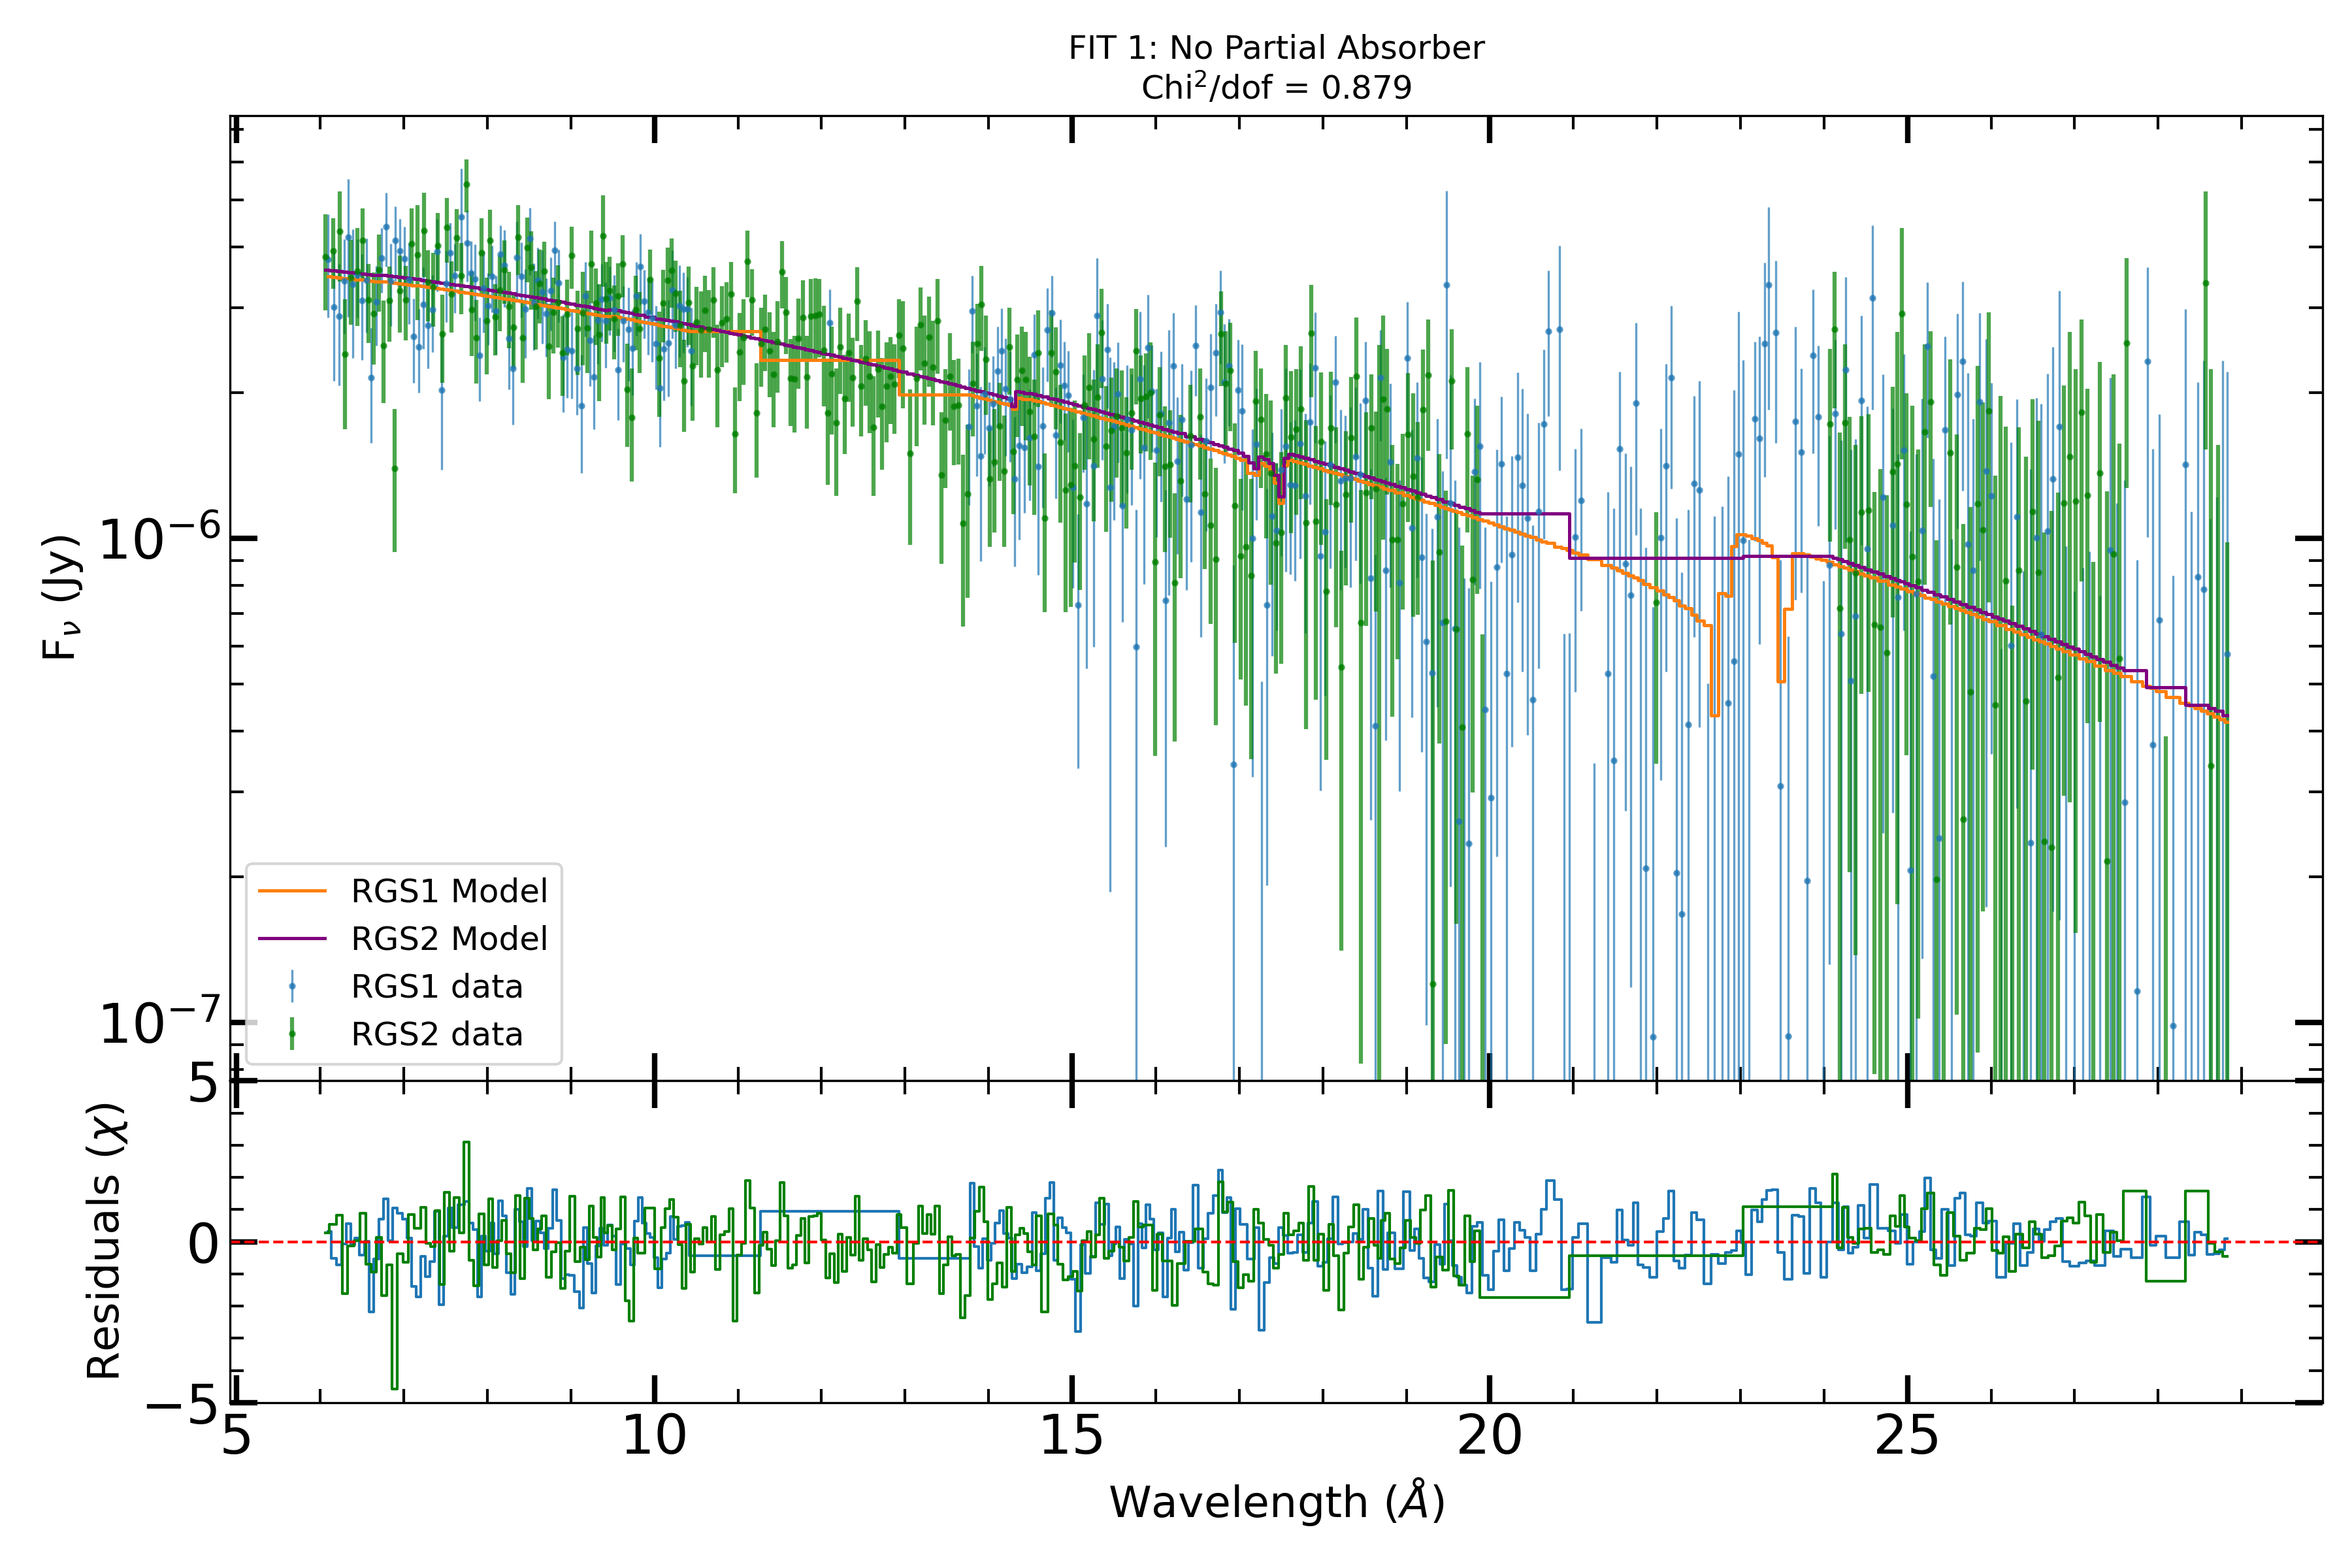

<IPython.core.display.Javascript object>

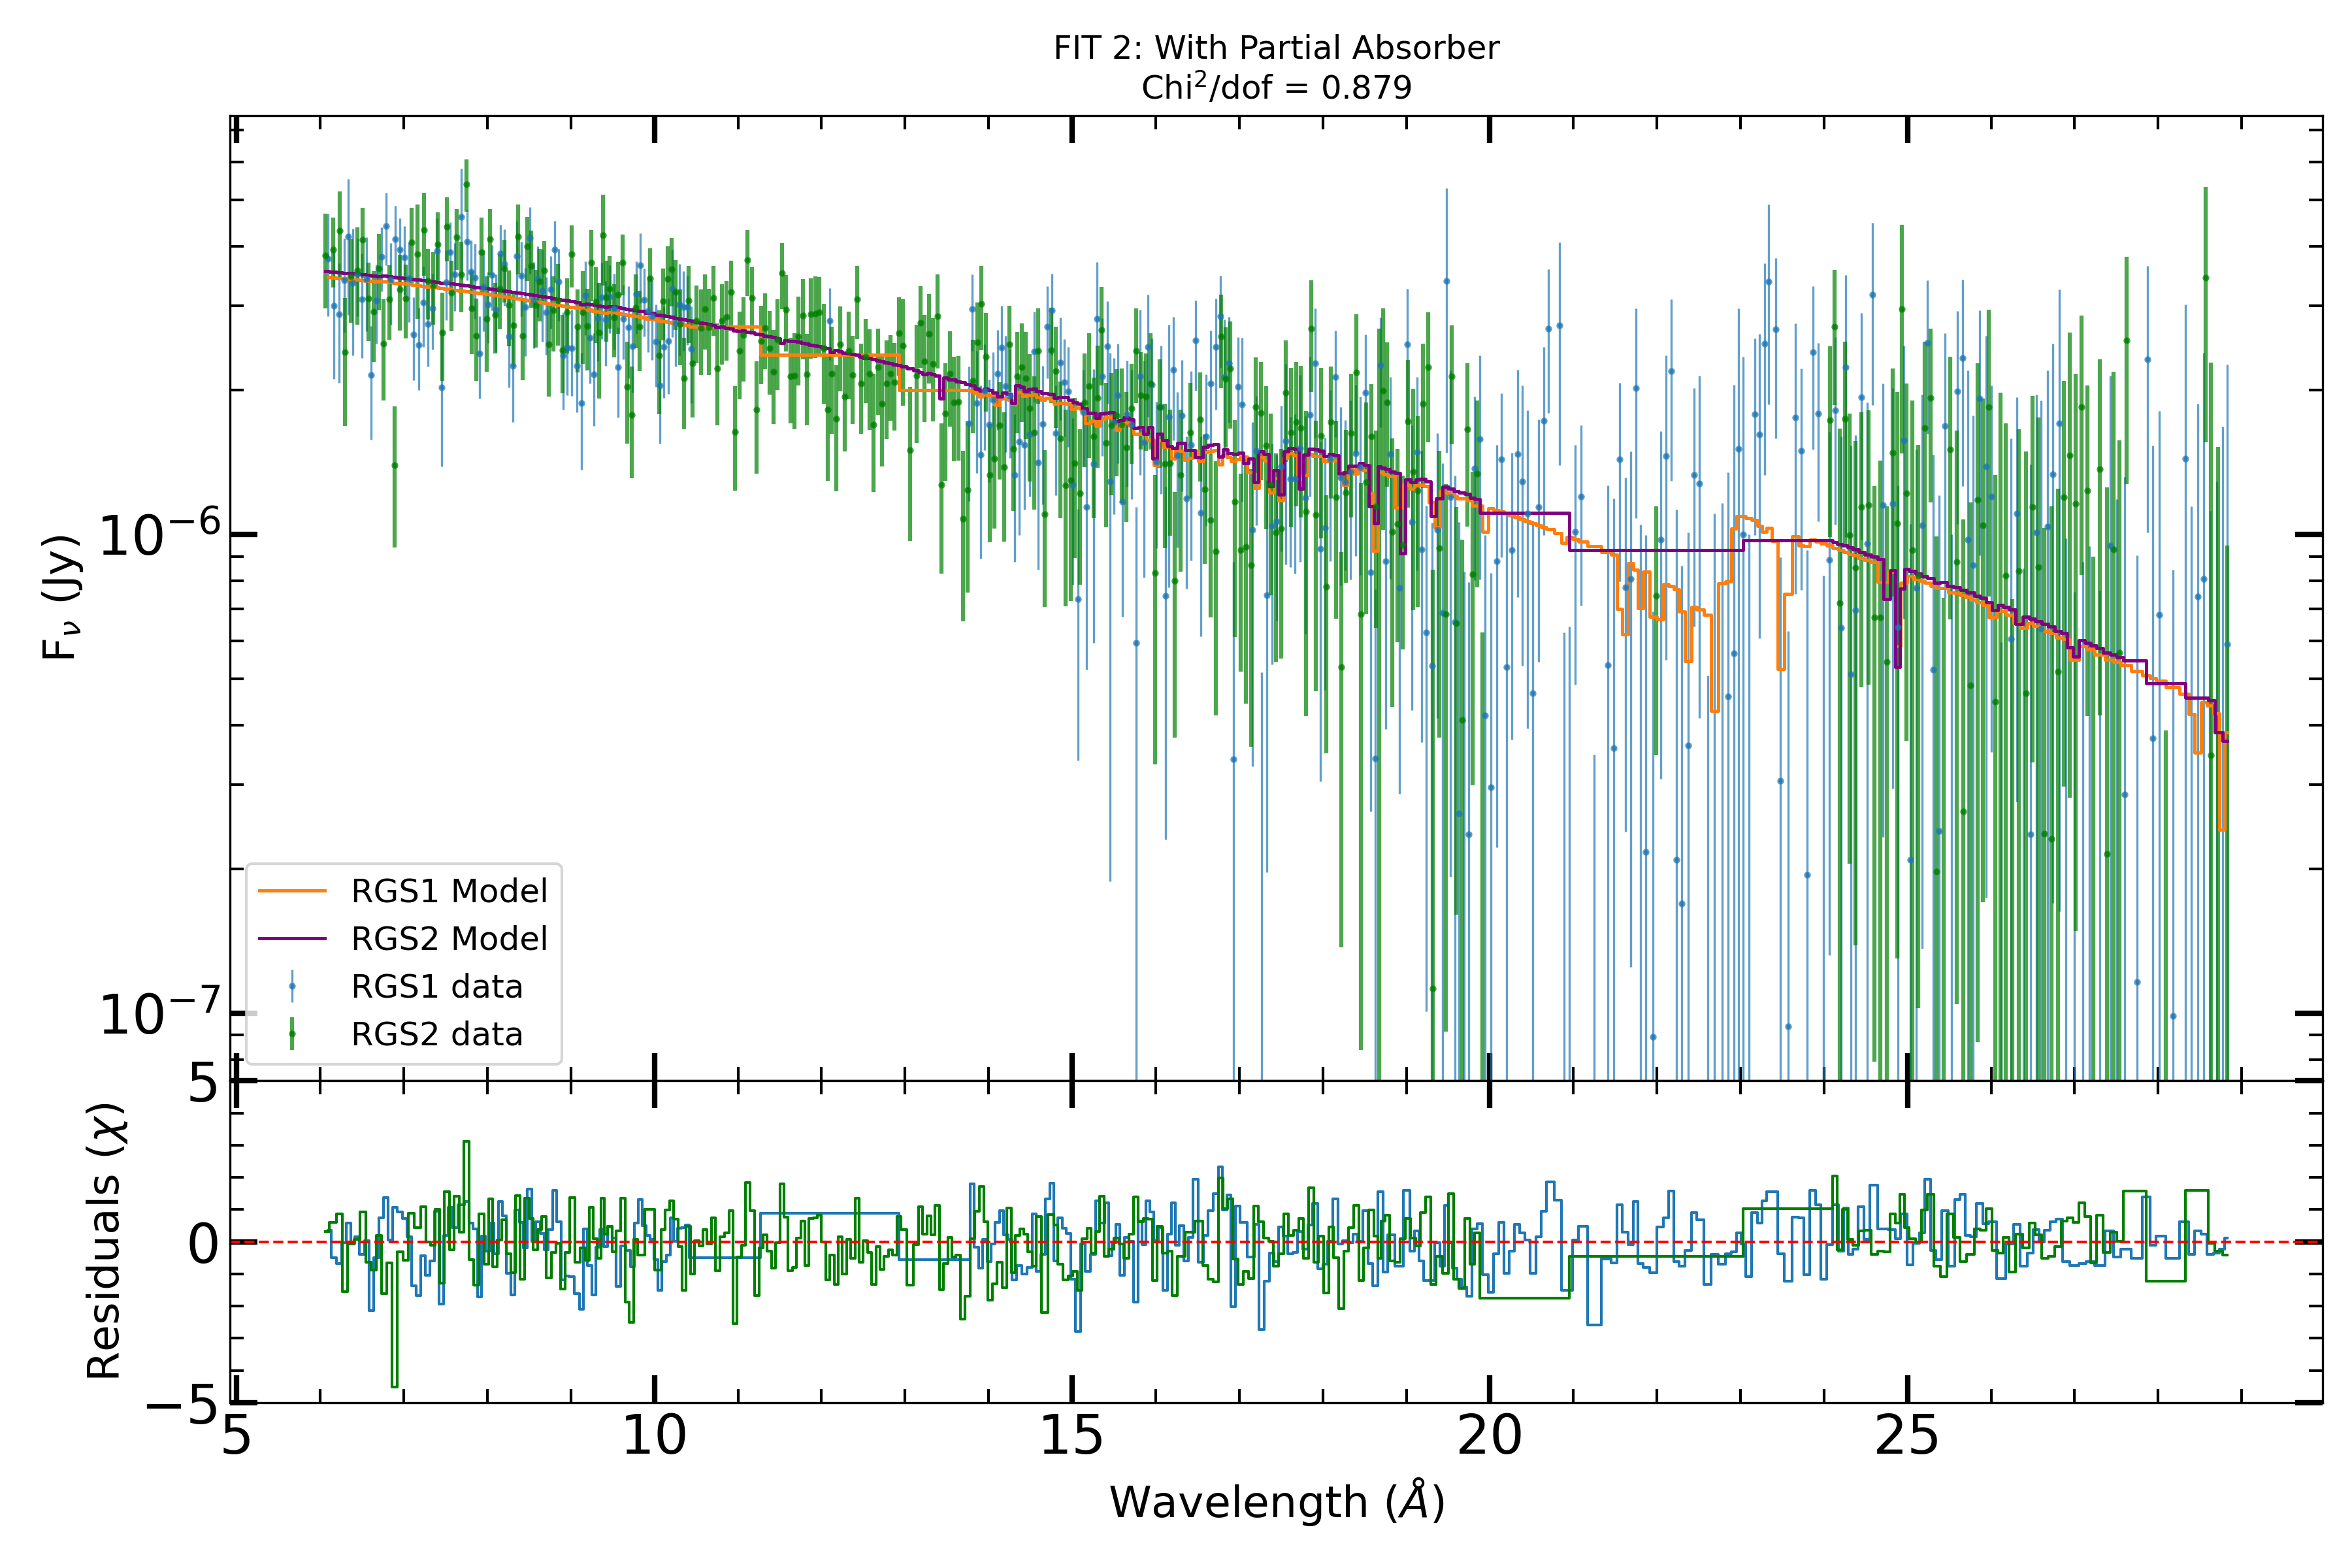

In [12]:
# --- PLOTTING FIT 1 ---


fig1, (ax1_spec, ax1_resid) = plt.subplots(2, 1, figsize=(12, 8), sharex=True,
                                            gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.0},
                                            dpi=100)

background_on = False
# Adjust spacing manually
plt.subplots_adjust(hspace=0.0)

# Spectrum
ax1_spec.errorbar(fit1_energy_x, fit1_data_y, yerr=fit1_data_err,
                  fmt='o', ms=1.5, elinewidth=0.8, alpha=0.7, label='RGS1 data')
ax1_spec.errorbar(fit1_energy_x_2, fit1_data_y_2, yerr=fit1_data_err_2,
                  fmt='o', ms=1.5, color='green', alpha=0.7, label='RGS2 data')
ax1_spec.step(fit1_energy_x, fit1_model_y, where='mid', color='C1', lw=1.2, label='RGS1 Model')
ax1_spec.step(fit1_energy_x_2, fit1_model_y_2, where='mid', color='purple', lw=1.2, label='RGS2 Model')
if background_on:
    ax1_spec.step(fit2_energy_x,fit2_bkg_y1, color='C6', lw=1.2, label='RGS1 Background')
    ax1_spec.step(fit2_energy_x_2,fit2_bkg_y2, color='C3', lw=1.2, label='RGS2 Background')
ax1_spec.set_yscale("log")
ax1_spec.set_ylabel(rf"{fit1_units}", fontsize=16)
ax1_spec.set_title(f"FIT 1: No Partial Absorber\nChi$^2$/dof = {fit1_chi2/fit1_dof:.3f}")
ax1_spec.legend(loc="best", fontsize=12)

# Residuals
ax1_resid.step(fit1_energy_x, fit1_residuals, where='mid', label='RGS1', lw=1.0)
ax1_resid.step(fit1_energy_x_2, fit1_residuals_2, where='mid', color='green', label='RGS2', lw=1.0)
ax1_resid.axhline(0, color='red', linestyle='--', lw=1.0)
ax1_resid.set_xlabel(r"Wavelength ($\AA$)", fontsize=16)
ax1_resid.set_ylabel(r"Residuals ($\chi$)", fontsize=16)
ax1_resid.set_ylim(-5, 5)
ax1_resid.tick_params(axis='both', which='major', labelsize=14)


for ax1 in [ax1_spec, ax1_resid]:
    ax1.minorticks_on()

    ax1.tick_params(axis='both', width=2, size=10, direction='in', labelsize=20,
                         bottom=True, top=True, left=True, right=True)
    ax1.tick_params(axis='both', which='minor', width=1, size=5, direction='in',
                         bottom=True, top=True, left=True, right=True)


plt.tight_layout()
filename=rf'../products/0865600201/rgs/time_intervals/{selected_interval}/fit1_{selected_interval}_spectrum.png'
plt.savefig(filename, dpi=300)
plt.close(fig1)
display(Image(filename=filename))
# --- PLOTTING FIT 2 ---

fig2, (ax2_spec, ax2_resid) = plt.subplots(2, 1, figsize=(12, 8),
                                            gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.0},
                                            dpi=100)

# Spectrum
ax2_spec.errorbar(fit2_energy_x, fit2_data_y, yerr=fit2_data_err,
                  fmt='o', ms=1.5, elinewidth=0.8, alpha=0.7, label='RGS1 data')
ax2_spec.errorbar(fit2_energy_x_2, fit2_data_y_2, yerr=fit2_data_err_2,
                  fmt='o', ms=1.5, color='green', alpha=0.7, label='RGS2 data')
ax2_spec.step(fit2_energy_x, fit2_model_y, where='mid', color='C1', lw=1.2, label='RGS1 Model')
ax2_spec.step(fit2_energy_x_2, fit2_model_y_2, where='mid', color='purple', lw=1.2, label='RGS2 Model')
if background_on:
    ax2_spec.step(fit2_energy_x,fit2_bkg_y1, color='C6', lw=1.2, label='RGS1 Background')
    ax2_spec.step(fit2_energy_x_2,fit2_bkg_y2, color='C3', lw=1.2, label='RGS2 Background')
ax2_spec.set_yscale("log")
ax2_spec.set_ylabel(rf"{fit2_units}", fontsize=16)
ax2_spec.set_title(f"FIT 2: With Partial Absorber\nChi$^2$/dof = {fit2_chi2/fit2_dof:.3f}")
ax2_spec.legend(loc="best", fontsize=12)
ax2_spec.set_xticklabels([])
ax2_spec.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# Residuals
ax2_resid.step(fit2_energy_x, fit2_residuals, where='mid', label='RGS1', lw=1.0)
ax2_resid.step(fit2_energy_x_2, fit2_residuals_2, where='mid', color='green', label='RGS2', lw=1.0)
ax2_resid.axhline(0, color='red', linestyle='--', lw=1.0)
ax2_resid.set_xlabel(r"Wavelength ($\AA$)", fontsize=16)
ax2_resid.set_ylabel(r"Residuals ($\chi$)", fontsize=16)
ax2_resid.set_ylim(-5, 5)

for ax2 in [ax2_spec, ax2_resid]:
    ax2.minorticks_on()

    ax2.tick_params(axis='both', width=2, size=10, direction='in', labelsize=20,
                         bottom=True, top=True, left=True, right=True)
    ax2.tick_params(axis='both', which='minor', width=1, size=5, direction='in',
                         bottom=True, top=True, left=True, right=True)

filename=rf'../products/0865600201/rgs/time_intervals/{selected_interval}/fit2_{selected_interval}_spectrum.png'
plt.tight_layout()
plt.savefig(filename, dpi=300)
plt.close(fig2)
display(Image(filename=filename))


In [13]:
# Quick check: Calculate counts from rates to decide on statistic
# Check both RGS1 and RGS2
print("\n" + "="*60)
print("COUNT STATISTICS CHECK")
print("="*60)

for spec_num, spec_name in [(1, "RGS1"), (2, "RGS2")]:
    s = x.AllData(spec_num)
    exposure = s.exposure
    counts = np.array([r * exposure for r in s.values if r > 0])
    min_counts = np.min(counts)
    median_counts = np.median(counts)
    mean_counts = np.mean(counts)

    print(f"\n{spec_name}:")
    print(f"  Exposure: {exposure:.1f} s")
    print(f"  Min counts/bin: {min_counts:.1f}")
    print(f"  Median counts/bin: {median_counts:.1f}")
    print(f"  Mean counts/bin: {mean_counts:.1f}")

    low_count_bins = np.sum(counts < 20)
    total_bins = len(counts)

    print(f"  Bins with <20 counts: {low_count_bins}/{total_bins} ({100*low_count_bins/total_bins:.1f}%)")

# Overall recommendation
s1 = x.AllData(1)
s2 = x.AllData(2)
all_counts = np.concatenate([
    [r * s1.exposure for r in s1.values if r > 0],
    [r * s2.exposure for r in s2.values if r > 0]
])
overall_min = np.min(all_counts)

print("\n" + "-"*60)
print("--- RECOMMENDATION ---")
if overall_min < 20:
    print(f"Minimum counts ({overall_min:.1f}) is below 20.")
    print("Gaussian statistics (Chi-Squared) are INVALID for low-count bins.")
    print("Use 'cstat' (C-statistic) for the most reliable results.")
    print("\nSet with: x.Fit.statMethod = 'cstat'")
else:
    print(f"All bins have >= 20 counts (Min: {overall_min:.1f}).")
    print("You can safely use 'chi' (Chi-Squared) or 'cstat'.")
    print("\nRecommended: x.Fit.statMethod = 'cstat' (always valid)")
print("="*60 + "\n")


COUNT STATISTICS CHECK

RGS1:
  Exposure: 33814.1 s
  Min counts/bin: 1.0
  Median counts/bin: 11.0
  Mean counts/bin: 16.1
  Bins with <20 counts: 190/286 (66.4%)

RGS2:
  Exposure: 33324.7 s
  Min counts/bin: 1.0
  Median counts/bin: 19.0
  Mean counts/bin: 20.3
  Bins with <20 counts: 148/290 (51.0%)

------------------------------------------------------------
--- RECOMMENDATION ---
Minimum counts (1.0) is below 20.
Gaussian statistics (Chi-Squared) are INVALID for low-count bins.
Use 'cstat' (C-statistic) for the most reliable results.

Set with: x.Fit.statMethod = 'cstat'



In [14]:
import numpy as np
import xspec as x

print("\n" + "="*60)
print("COUNT STATISTICS CHECK (GROUPED BINS)")
print("="*60)

for spec_num, spec_name in [(1, "RGS1"), (2, "RGS2")]:
    s = x.AllData(spec_num)
    exposure = s.exposure

    # Evaluate the grouped bins directly without the channel index mapping
    counts = np.array([r * exposure for r in s.values if r > 0])

    if len(counts) == 0:
        print(f"\n{spec_name}: No valid bins.")
        continue

    min_counts = np.min(counts)
    median_counts = np.median(counts)
    mean_counts = np.mean(counts)

    print(f"\n{spec_name}:")
    print(f"  Exposure: {exposure:.1f} s")
    print(f"  Grouped Bins Evaluated: {len(counts)}")
    print(f"  Min counts/bin: {min_counts:.1f}")
    print(f"  Median counts/bin: {median_counts:.1f}")
    print(f"  Mean counts/bin: {mean_counts:.1f}")

    low_count_bins = np.sum(counts < 20)
    total_bins = len(counts)

    print(f"  Bins with <20 counts: {low_count_bins}/{total_bins} ({100*low_count_bins/total_bins:.1f}%)")

# Overall recommendation
s1 = x.AllData(1)
s2 = x.AllData(2)

counts1 = [r * s1.exposure for r in s1.values if r > 0]
counts2 = [r * s2.exposure for r in s2.values if r > 0]
all_counts = np.concatenate([counts1, counts2])

if len(all_counts) > 0:
    overall_min = np.min(all_counts)

    print("\n" + "-"*60)
    print("--- RECOMMENDATION ---")
    if overall_min < 20:
        print(f"Minimum net counts ({overall_min:.1f}) is below 20.")
        print("Gaussian statistics (Chi-Squared) are INVALID for low-count bins.")
        print("Use 'cstat' (C-statistic) for the most reliable results.")
        print("\nSet with: x.Fit.statMethod = 'cstat'")
    else:
        print(f"All bins have >= 20 counts (Min: {overall_min:.1f}).")
        print("You can safely use 'chi' (Chi-Squared) or 'cstat'.")
        print("\nRecommended: x.Fit.statMethod = 'cstat' (always valid)")
    print("="*60 + "\n")


COUNT STATISTICS CHECK (GROUPED BINS)

RGS1:
  Exposure: 33814.1 s
  Grouped Bins Evaluated: 286
  Min counts/bin: 1.0
  Median counts/bin: 11.0
  Mean counts/bin: 16.1
  Bins with <20 counts: 190/286 (66.4%)

RGS2:
  Exposure: 33324.7 s
  Grouped Bins Evaluated: 290
  Min counts/bin: 1.0
  Median counts/bin: 19.0
  Mean counts/bin: 20.3
  Bins with <20 counts: 148/290 (51.0%)

------------------------------------------------------------
--- RECOMMENDATION ---
Minimum net counts (1.0) is below 20.
Gaussian statistics (Chi-Squared) are INVALID for low-count bins.
Use 'cstat' (C-statistic) for the most reliable results.

Set with: x.Fit.statMethod = 'cstat'

